# Analysis of H5 ferret sera strain neuts

### Set up Analysis

In [1]:
import os
import warnings
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from plotnine import *
import seaborn

import altair as alt

import neutcurve
from neutcurve.colorschemes import CBMARKERS, CBPALETTE

import yaml

In [2]:
warnings.simplefilter('ignore')

Read config file.

In [3]:
with open('config.yaml') as f:
    config = yaml.safe_load(f)

Set seaborn theme:

In [4]:
theme_set(theme_seaborn(style='white', context='talk', font_scale=1))
plt.style.use('seaborn-white')

In [5]:
resultsdir=config['resultsdir']
os.makedirs(resultsdir, exist_ok=True)

## Read in data

In [6]:
frac_infect = pd.read_csv(config['serum_neuts_ferret_pHW_strain_validation'], index_col=0)

## Fit Hill curve to data using [`neutcurve`](https://jbloomlab.github.io/neutcurve/)

In [7]:
fits = neutcurve.CurveFits(frac_infect,  fixtop= True)

In [8]:
fitparams = (
        fits.fitParams(ics=[50,90])
        # get columns of interest
        [['serum', 'ic50', 'ic90', 'virus']]
        .assign(NT50=lambda x: 1/x['ic50'], NT90=lambda x: 1/x['ic90'])        
        )

In [9]:
fitparams

,serum,ic50,ic90,virus,NT50,NT90
0,ferret-7,0.000125,0.000328,A/American Wigeon/South Carolina/USDA-000345-0...,8009.684808,3049.798100
1,ferret-7,0.000770,0.004023,A/domesticcat/Oklahoma/24009118002/2024,1298.911622,248.558338
2,ferret-7,0.007937,0.016897,A/dairycattle/Texas/24009028003/2024,126.000061,59.180633
3,ferret-10,0.000156,0.000175,A/American Wigeon/South Carolina/USDA-000345-0...,6426.958505,5702.625162
4,ferret-10,0.000421,0.001799,A/domesticcat/Oklahoma/24009118002/2024,2372.645092,555.781362
5,ferret-10,0.001616,0.003526,A/dairycattle/Texas/24009028003/2024,618.793120,283.596784
6,ferret-19,0.000166,0.000190,A/American Wigeon/South Carolina/USDA-000345-0...,6007.578279,5274.925017
7,ferret-19,0.001593,0.005917,A/domesticcat/Oklahoma/24009118002/2024,627.661981,168.999520
8,ferret-19,0.004867,0.007665,A/dairycattle/Texas/24009028003/2024,205.472239,130.454649


## Plot neut curves for sera

Saving to ferret_H5_sera_strain_validation_neuts.pdf


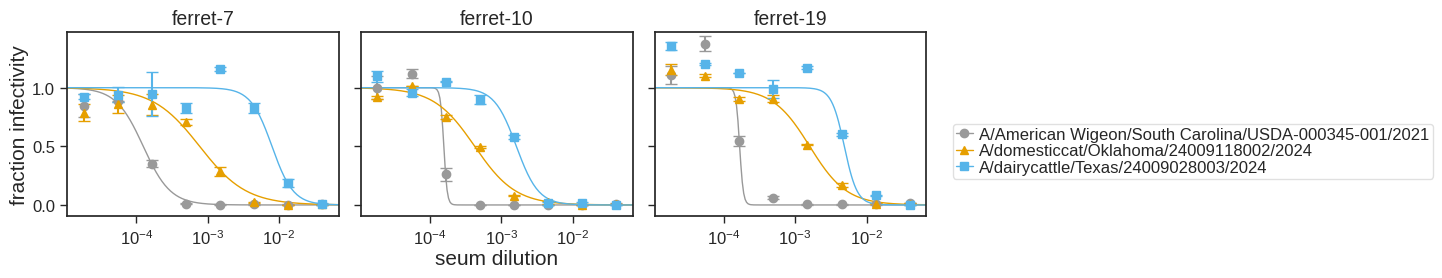

In [10]:
fig, axes = fits.plotSera(xlabel='seum dilution',
                          max_viruses_per_subplot = 3,
                         )
plotfile = 'ferret_H5_sera_strain_validation_neuts.pdf'
print(f"Saving to {plotfile}")
fig.savefig(f'{resultsdir}/{plotfile}', bbox_inches='tight')

# Correlate to DMS data

In [11]:
strains = pd.read_csv(config['strains'])
strains.head()

,strain,mutation
0,A/domesticcat/Oklahoma/24009118002/2024,L122Q
1,A/domesticcat/Oklahoma/24009118002/2024,P162Q
2,A/dairycattle/Texas/24009028003/2024,L122Q
3,A/dairycattle/Texas/24009028003/2024,A160T
4,A/skunk/NewMexico/24006483001original/2024,L122Q


### ferret-7

In [13]:
ferret7_escape = pd.read_csv(config['ferret_7_sera_escape'])
f7_strains = strains.merge(ferret7_escape[['mutation','escape_mean']], on='mutation', how='left')
f7_escape = f7_strains.groupby('strain', as_index=False)['escape_mean'].sum()
f7_escape['serum'] = 'ferret-7'
f7_df = f7_escape.merge(fitparams[['virus','ic90', 'serum']], left_on=['strain', 'serum'], right_on=['virus','serum'], how='left').dropna()
f7_df = f7_df[['serum', 'strain', 'escape_mean', 'ic90']]
f7_df

,serum,strain,escape_mean,ic90
0,ferret-7,A/American Wigeon/South Carolina/USDA-000345-0...,0.0000,0.000328
3,ferret-7,A/dairycattle/Texas/24009028003/2024,3.7401,0.016897
4,ferret-7,A/domesticcat/Oklahoma/24009118002/2024,3.0261,0.004023


### ferret-10

In [14]:
ferret10_escape = pd.read_csv(config['ferret_10_sera_escape'])
f10_strains = strains.merge(ferret10_escape[['mutation','escape_mean']], on='mutation', how='left')
f10_escape = f10_strains.groupby('strain', as_index=False)['escape_mean'].sum()
f10_escape['serum'] = 'ferret-10'
f10_df = f10_escape.merge(fitparams[['virus','ic90', 'serum']], left_on=['strain', 'serum'], right_on=['virus','serum'], how='left').dropna()
f10_df = f10_df[['serum', 'strain', 'escape_mean', 'ic90']]
f10_df

,serum,strain,escape_mean,ic90
0,ferret-10,A/American Wigeon/South Carolina/USDA-000345-0...,0.0000,0.000175
3,ferret-10,A/dairycattle/Texas/24009028003/2024,1.6980,0.003526
4,ferret-10,A/domesticcat/Oklahoma/24009118002/2024,1.1791,0.001799


### ferret-19

In [15]:
ferret19_escape = pd.read_csv(config['ferret_19_sera_escape'])
f19_strains = strains.merge(ferret19_escape[['mutation','escape_mean']], on='mutation', how='left')
f19_escape = f19_strains.groupby('strain', as_index=False)['escape_mean'].sum()
f19_escape['serum'] = 'ferret-19'
f19_df = f19_escape.merge(fitparams[['virus','ic90', 'serum']], left_on=['strain', 'serum'], right_on=['virus','serum'], how='left').dropna()
f19_df = f19_df[['serum', 'strain', 'escape_mean', 'ic90']]
f19_df

,serum,strain,escape_mean,ic90
0,ferret-19,A/American Wigeon/South Carolina/USDA-000345-0...,0.0000,0.000190
3,ferret-19,A/dairycattle/Texas/24009028003/2024,2.1017,0.007665
4,ferret-19,A/domesticcat/Oklahoma/24009118002/2024,1.2407,0.005917


## Plot correlations

In [16]:
merge_df = pd.concat([f7_df, f10_df, f19_df], ignore_index=True)
merge_df

,serum,strain,escape_mean,ic90
0,ferret-7,A/American Wigeon/South Carolina/USDA-000345-0...,0.0000,0.000328
1,ferret-7,A/dairycattle/Texas/24009028003/2024,3.7401,0.016897
2,ferret-7,A/domesticcat/Oklahoma/24009118002/2024,3.0261,0.004023
3,ferret-10,A/American Wigeon/South Carolina/USDA-000345-0...,0.0000,0.000175
4,ferret-10,A/dairycattle/Texas/24009028003/2024,1.6980,0.003526
5,ferret-10,A/domesticcat/Oklahoma/24009118002/2024,1.1791,0.001799
6,ferret-19,A/American Wigeon/South Carolina/USDA-000345-0...,0.0000,0.000190
7,ferret-19,A/dairycattle/Texas/24009028003/2024,2.1017,0.007665
8,ferret-19,A/domesticcat/Oklahoma/24009118002/2024,1.2407,0.005917


In [17]:
# Calculate the correlation for each subset of data
merge_df['log_ic90'] = np.log(merge_df['ic90'])

# Calculate the correlation on the log-transformed IC90 values
correlations = merge_df.groupby('serum').apply(lambda df: df['escape_mean'].corr(df['log_ic90'])).reset_index()
correlations.columns = ['serum', 'correlation']

# Merge the correlation values back to the original DataFrame
merge_df = merge_df.merge(correlations, on='serum')

In [19]:
merge_df

,serum,strain,escape_mean,ic90,log_ic90,correlation
0,ferret-7,A/American Wigeon/South Carolina/USDA-000345-0...,0.0000,0.000328,-8.022831,0.982551
1,ferret-7,A/dairycattle/Texas/24009028003/2024,3.7401,0.016897,-4.080594,0.982551
2,ferret-7,A/domesticcat/Oklahoma/24009118002/2024,3.0261,0.004023,-5.515678,0.982551
3,ferret-10,A/American Wigeon/South Carolina/USDA-000345-0...,0.0000,0.000175,-8.648682,0.996174
4,ferret-10,A/dairycattle/Texas/24009028003/2024,1.6980,0.003526,-5.647553,0.996174
5,ferret-10,A/domesticcat/Oklahoma/24009118002/2024,1.1791,0.001799,-6.320375,0.996174
6,ferret-19,A/American Wigeon/South Carolina/USDA-000345-0...,0.0000,0.000190,-8.570720,0.936964
7,ferret-19,A/dairycattle/Texas/24009028003/2024,2.1017,0.007665,-4.871026,0.936964
8,ferret-19,A/domesticcat/Oklahoma/24009118002/2024,1.2407,0.005917,-5.129896,0.936964


In [23]:
# Base chart
base = alt.Chart(merge_df).mark_point(filled=True, size=100).encode(
    x=alt.X('escape_mean', scale=alt.Scale(padding=10)),
    y=alt.Y('ic90', scale=alt.Scale(type='log', padding=10)),
    color=alt.Color('strain', legend=alt.Legend(orient='right', title='Strain', titleLimit=200, labelLimit=200))
).properties(
    width=200,
    height=200
)

# Text chart for R values
text = alt.Chart(merge_df).mark_text(
    align='left',
    baseline='top',
    dx=5,
    dy=5,
    fontSize=10,
    color='black'
).encode(
    x=alt.value(1),  # Adjust the position as needed
    y=alt.value(1),  # Adjust the position as needed
    text=alt.Text('correlation:N', format='.2f')  # Treat correlation as nominal for text formatting
)

# Combine the base chart and text annotations
layer = alt.layer(base, text)

# Facet and configure the chart with padding and fixed facet order
chart = layer.facet(
    facet=alt.Facet('serum:N', sort=['mouse_1-02', 'mouse_1-03', 'mouse_1-05']),
    columns=3
).configure_axis(
    grid=False
).configure_view(
    strokeWidth=0
).configure_legend(
    titleFontSize=12,
    labelFontSize=10,
    orient='right',
    titleLimit=2,
    labelLimit=2
).properties(
    padding={'left': 2, 'right': 200, 'top': 20, 'bottom': 20}  # Increase right padding to ensure the legend is fully visible
)
chart.save("./results/ferret_sera_strain_validation.html")

chart


alt.FacetChart(...)